# Modul 04 - 1-Qubit Gatter II

Eine Schulungsserie der Meetup-Gruppe **[Quantum Computing meets Business - Rhineland](https://www.meetup.com/de-DE/Quantum-Computing-meets-Business-Rhineland/)**

(Adapted from [qiskit-textbook](https://github.com/qiskit-community/qiskit-textbook))

In [25]:
run ../content/00-Inhalt_Tools.ipynb

### Kurzübung 1

1. Schreiben Sie das H-Gatter als die äußeren Produkte der Vektoren |0⟩, |1⟩, |+⟩ und |−⟩.

- $H = |+\rangle\langle0| + |-\rangle\langle1|$

2. Zeigen Sie, dass die Anwendung der Folge von Gattern HZH, auf einen beliebigen Qubit-Zustand äquivalent zur Anwendung eines X-Gatters ist.

Durch Matrix Multiplikation: $HZH = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}\begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}\tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} = X$

3. Finden Sie eine Kombination von X-, Z- und H-Gattern, die äquivalent zu einem Y-Gatter ist (ohne Berücksichtigung der globalen Phase).

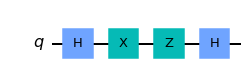

In [26]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_bloch_multivector
#from qiskit_textbook.tools import array_to_latex

qc = QuantumCircuit(1)
# Begin sequence of gates
qc.h(0)
qc.x(0)
qc.z(0)
qc.h(0)

qc.draw("mpl")

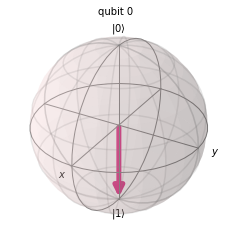

In [27]:
svsim = Aer.get_backend('statevector_simulator')
state = svsim.run(qc).result().get_statevector()
plot_bloch_multivector(state)

In [28]:
# See combined unitary
simulator = Aer.get_backend('unitary_simulator')
result = execute(qc, simulator).result()
unitary = result.get_unitary()
print("Unitary:")
print(unitary.to_matrix())
# Is equivalent to Y-gate by factor of i
print("1j * Unitary:")
print(1j*unitary.to_matrix())

Unitary:
[[ 6.123234e-17+0.j -1.000000e+00+0.j]
 [ 1.000000e+00+0.j  6.123234e-17+0.j]]
1j * Unitary:
[[ 0.+6.123234e-17j -0.-1.000000e+00j]
 [ 0.+1.000000e+00j  0.+6.123234e-17j]]


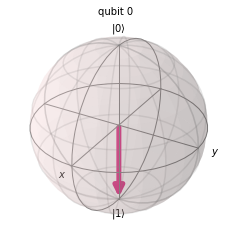

In [29]:
from qiskit import QuantumCircuit, Aer
from math import pi, sqrt
from qiskit.visualization import plot_bloch_multivector, plot_histogram

qc = QuantumCircuit(1)
# Begin sequence of gates
qc.h(0)
qc.x(0)
qc.z(0)
qc.h(0)

svsim = Aer.get_backend('statevector_simulator')
state = svsim.run(qc).result().get_statevector()
plot_bloch_multivector(state)

### Kurzübung 2

2. Benutzen Sie Qiskit, um die Wahrscheinlichkeit der Messung eines |0⟩-Qubits in den Zuständen |+⟩ und |−⟩ darzustellen (Tipp: Sie sollten .get_counts() und plot_histogram() benutzen)

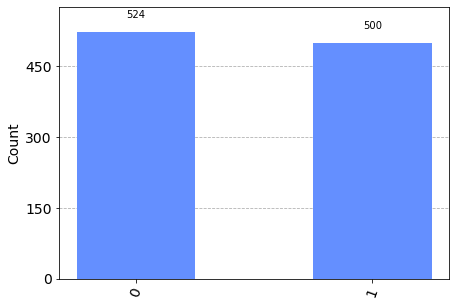

In [30]:
import numpy as np
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

qc = QuantumCircuit(1,1) # erstellt eine Schaltung mit 1 Qubit und 1 Bit
initial_state = [1,1]/np.sqrt(2) # Definiere den Initialzustand als |+> ([1,-1]/np.sqrt(2) wird zu |->)
qc.initialize(initial_state, 0) # Initialisierung
qc.measure(0,0) # Messe Qubit 0 und speichere das Ergebnis in Bit 0

backend = Aer.get_backend('qasm_simulator') # Simulator auswählen
counts = execute(qc,backend).result().get_counts() # Ausführung der Simulation und Ausgabe der counts
plot_histogram(counts) # Darstellung der Ergebnisse als Histogramm

3. Versuchen Sie, eine Funktion zu erstellen, die in der Y-Basis misst.

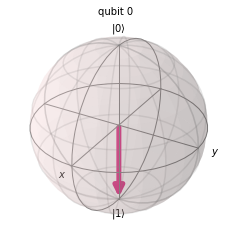

In [31]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import math

def y_measure(qc, qubit, cbit):
    qc.sdg(qubit)
    qc.h(qubit)
    qc.measure(qubit, cbit)


qc = QuantumCircuit(1,1) # create quantum circuit with one qubit and one classical bit
initial_state = [1/math.sqrt(2), -1j/math.sqrt(2)] # define our initial state (1 in Y-basis)
qc.initialize(initial_state, 0) # add initialization operation to qubit 0
y_measure(qc, 0,0) # measure qubit 0 and store the results in classical bit 0

backend = Aer.get_backend('statevector_simulator') # Tell Qiskit how to simulate our circuit
result = execute(qc,backend).result() # Do the simulation, returning the result
plot_histogram(result.get_counts()) # Display the results in a histogram
plot_bloch_multivector(result.get_statevector())


## Qiskit

In [32]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.24.1', 'qiskit-aer': '0.12.0', 'qiskit-ignis': '0.7.0', 'qiskit-ibmq-provider': '0.20.2', 'qiskit': '0.43.1', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

## Copyright

Copyright 2021 Dual Software GmbH and SVA System Vertrieb Alexander GmbH

Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at http://www.apache.org/licenses/LICENSE-2.0.

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.